# A Recurrent Network Mechanism of Time Integration in Perceptual Decisions
Wong,  Wang
Journal of Neuroscience, January 2006, 26(4):1212-1328

## Modelling Heading Perception in a Vestibular Discimination Experiment using a Recurent Network Mechanism

Sensory information regarding self-motion through an environment is gathered by the vestibular system. This model generates reaction times and ramping spike activity for two neural populations, tuned to different heading directions in a two-alternitive forced choice task. This study builds upon the modelling work of Wong and Wang (2006) and the experimental results of Butler et al (2010).  

## The two-variable network model for heading discrimination 

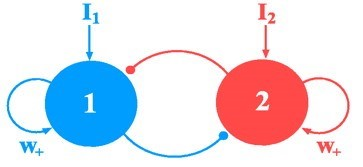


This model is a simplified two-variable version of a biophysically accurate cortial model of decision maing. The figure above, from Wong and Wang (2006), depicts a communicating pair of neural populations. Population $1$ shown in blue and population $2$ in red, are sensitive to leftward or rightward heading motion respectively. Each population is auto-excitatory, depicted by the recurrent $W_+$ connections, and extra-inhibitory, shown by the recurrent connections bridging both populations. The system is fed by two external inputs, $I_1$ and $I_2$. In a vestibular context, these inputs would be from areas of sensory encoding for heading direction such as the MSTd area which has been linked to vestibular self-motion information for heading discrimination, Butler et al (2010). 

## Calling Library Fuctions

In [1]:
# LIBRARY
import numpy as np # vector manipulation
import math  # math functions
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


## Defining functions



### Firing Rate

The firing rate $r_i$ of population $1$ or $2$ is found by;  

$$r_1 = H_1(x_1,x_2),$$
$$r_2 = H_2(x_1,x_2),$$

where $H_i$ is an input-output relation adapted from Abbot and Chance (2005) and $x_i$ is the total synaptic current accounting for all recurrent and external inputs. Recurrent inputs consist of both excitatory and inhibitory currents.

### Total Synaptic Current

In this reduced system, the total synaptic current to populations $1$ and $2$ is described by the following equations for $x_1$ and $x_2$;  
$$ x_{1}=J_{11}S_1-J_{12}S_2+I_{0}+I_{1}+I_{noise,1},$$
$$ x_{2}=J_{22}S_2-J_{21}S_1+I_{0}+I_{2}+I_{noise,2}.$$  

<b>External inputs:</b>  
$I_{0}$ - common background input to both populations set to constant $0.3255 nA$   
$I_i$ - motion information from MSTd area, dependant on heading angel (equation described below)  
$I_{noise,i}$ - noise term added for charateristic stochastic process of evidence accumulation (equation described below)  

<b>Recurrent inputs:</b>   
Communication between both populations are dependant upon the dominant synaptic gating variable of the recipient population, either $S_1$ or $S_2$, whose evolution are defined in an equation below.    
Synaptic couplings, $J_{i,j}$, define the connectivity between population $i$ and $j$. Wang (2006) recomends values of $J_{11}=0.2609 =J_{22}$ and $J_{12}=0.0497= J_{21}$ based off Roitman and Shadlan (2002). These paprameter values may not be optimal for other simulations. 

In [2]:
def total_synaptic_current(S_1,S_2,I_1,I_2,I_noise_1,I_noise_2):
    # Synaptic coupling
    J_11=0.2609 # nA
    J_22=0.2609 # nA
    J_12=0.0497 # nA
    J_21=0.0497 # nA
    I_0=0.3255  # nA
    x_1=J_11*S_1-J_12*S_2+I_0+I_1+I_noise_1
    x_2=J_22*S_2-J_21*S_1+I_0+I_2+I_noise_2
    return x_1, x_2


### Input-Output Relation

The population firing rate is found as a function of the input currents defined above in $x_i$. Parameters $a, b$ and $d$ correspond to the gain factor, threshold potential and noise factor respectivly. 

$$ H_i(x_i)=\frac{a x_i-b}{(1-exp[-d(ax_i-b)]}$$

#### Parameter values of $H_i$
$ a=207 (VnC)^{-1}; \:\:  b=108Hz; \:\:d=0.154s$

In [3]:
def H(x):
    a=270 # Hz/nA
    b=108 # Hz
    d=.154 # seconds
    f=(a*x-b)/(1-np.exp(-d*(a*x-b)))
    return f
x=np.arange(-1,1,0.01)


### Synaptic Gating Variables
$$ \frac{d S_{i}}{dt} =-\frac{S_{i}}{\tau_S}+(1-S_{i})\gamma H_{i}$$




This equation describes the change in $S_i$, the synaptic gating variable, of the system i.e. the opening and closing of ion channels. It governs the time evolution of the system and is dependant upon the synaptic gating variable, $S_i$, and it's decay time constant, $\tau_S$, as well as the population activity measure, $H(x_i)$ described above. 

#### Approximated below using Heun's method: 
Heun's Method: $y_{i+1} = y_{i} + \frac{h}{2}(f(y_i) + f(y_i + hf(y_i)))$

$$k=h(-\frac{S}{\tau_S}+(1-S)\gamma H(x)$$
$$S_{new}=S_i+h(-\frac{S+\frac{k_1}{2}}{\tau_S}+(1-S+\frac{k}{2})\gamma H(x)$$

#### Parameter values
$\tau_S=0.1s;  \gamma=0.641$

In [4]:
def Network_Dynamics(S,x):
    h=0.1/1000 #ms
    gamma=0.641
    tau_S=.1  #100s
    k=(-S/tau_S+(1-S)*gamma*H(x))
    S_new=S+h*(-(S+h/2*k)/tau_S+(1-S+h/2*k)*gamma*H(x))
    return S_new

### External Input 

The inputs to our decision making populations should mimic the output from upstream areas for heading information encoding. The MSTd region has been identified as a potential neural basis of multimodal heading perception, and is thus far the most extensivly studied neural substrate for visual–vestibular cue integration, Butler et al (2010), DeAngelis and Angelaki (2012). 


Strength and direction of the stimulius motion are defined by the value and sign of the heading angle, $c'$.

$$ I_1=J_{A,ext}\mu_0\left(1+ \frac{c'}{100} \right) $$
$$ I_2=J_{A,ext}\mu_0\left(1- \frac{c'}{100} \right) $$

#### Parameter values for both directions are the same
$ \mu_0= 30 Hz; J_{A,ext}= 5.2 × 10^{−4} nA · Hz^{−1} $


In [5]:
def I_input_1(c_dash):
    J_A_ext=5.2/10000 # nA/Hz
    mu_0=30 # Hz
    I_motion=J_A_ext*mu_0*(1+(c_dash)/100)
    return I_motion

In [6]:
def I_input_2(c_dash):
    J_A_ext=5.2/10000  # nA/Hz
    mu_0=30 # Hz
    I_motion=J_A_ext*mu_0*(1-(c_dash)/100)
    return I_motion

### Background activity

The stochastic motion typical of evidence accumulation in a diffusion model is added to the system by means of the following equation;

$$ \tau_{AMPA}\frac{d I_{noise,i}(t)}{dt} =-I_{noise,i}(t)+\eta_i(t)\sqrt{\tau_{AMPA}}\sigma_{noise},$$  

a Ornwtein-Uhlenbeck process where $I_{noise,i}$ is the input noise term, $\sigma^2_{noise}$ is it's varience and $\eta$ is a Gaussian white noise with zero mean and unit varience. 

#### Background activity is approximated in the code below using Euler's method 
$$ I_{noise,i+1}=I_{noise,i}+\frac{h}{\tau_{AMPA}}(-I_{noise,i}+\eta_i\sqrt{\tau_{AMPA}}\sigma)$$  


#### Parameter values
$ \tau_{AMPA}=2ms; \:\: \sigma_{noise}=0.02nA  $

In [7]:
def Background_Activity(I_noise):
    h=0.1
    sigma_noise=0.02 # nA
    tau_AMPA=2 #ms
    eta_noise=np.random.normal(0,1,1) #Gaussian white noise
    I_noise_new=I_noise+h/tau_AMPA*(-I_noise+eta_noise*np.sqrt(tau_AMPA)*sigma_noise) #numerical approximation
    return I_noise_new

## Material and Methods

This model simulates passive motion through an environment at different heading directions. It is set to run $N$ trials for each heading direction. Heading directions can be altered, values $<0$ accoutnt for leftward motion while values $>0$ account for rightward motion. This experiment is concered with intergration of vestibular information only, with a response indicating that motion is occuring leftward or rightward relative to centre $0$&deg;. Both response and reaction time are recorded when the spiking activity of either population reaches a constant threshold of $15 Hz$.

### Initialisation of variables

In [8]:
N=200 # number of trials per heading direction
Vector_heading=[-20.0,-10.0,-5.0,-3.0,-1.0,1.0,3.0,5.0,10.0,20.0] # heading directions

h=0.1 # timestep for "time" vector below
time=np.arange(-100,1000,h) # time evolution of the system, prior and subsequent to stimulus onset at t=0

# Prameter values based on fitting of data from Roitman and Shadlen (2002)
Threshold=15 # Hz
J_A_ext=5.2/10000 # nA/Hz
mu_0=30 # Hz

# Initalise external inputs and Firing rates to 0
I_1=0.0*np.ones(len(time)) 
I_2=0.0*np.ones(len(time)) 
Firing_target_1=0*time # H(x)
Firing_target_2=0*time 

# record average RTs for each heading direction
RT_coh_right=np.zeros(len(Vector_heading)) # rightward choices
RT_coh_left=np.zeros(len(Vector_heading)) # leftward choices
RT_avg=np.zeros(len(Vector_heading)) # average of both above

# collect proportion of rightward choices
Prob=np.zeros(len(Vector_heading))
#count=0

### Generating response and reaction times 

In [9]:
for j in range(0,len(Vector_heading)): # works through all heading directions
    ANSWER=np.zeros(N) # reset response and RTs to 0 for each new heading direction
    RT=np.zeros(N)


    for n in range(0,N): # number of trials per heading direction
        if n%500==0:
               print('Heading= %2.2f , n= %d' %(Vector_heading[j],n)) # print of what trial number & heading direction
       
        I_noise_1=0.001*np.random.normal(0,1,len(time)) # new normal random initalisation of background activity equation
        I_noise_2=0.001*np.random.normal(0,1,len(time))  # for each trial

        x_1=J_A_ext*mu_0*np.random.uniform(0,1,len(time))   # Initalise x to values between 0 & 0.156 
        x_2=J_A_ext*mu_0*np.random.uniform(0,1,len(time))   # needed to initalise H & S, functions used after that

        S_1=0.2*np.ones(len(time))+0.01*np.random.normal(0,1,len(time)) # Initalise S to 0.2 but with a little noise 
        S_2=0.2*np.ones(len(time))+0.01*np.random.normal(0,1,len(time)) 
 

        Firing_target_1[0]=H(x_1[0]) # firing rate from the input-output relation H(x)
        Firing_target_2[0]=H(x_2[0])


        count=0
        for i in range (0,len(time)-1):
            if time[i] >=0 and time[i]<1000:   #should this be N????? Number of trials 
                c_dash=Vector_heading[j]
            else:
                c_dash=0.0

        
            I_noise_1[i+1]=Background_Activity(I_noise_1[i]) # solve for noise at new timepoint
            I_noise_2[i+1]=Background_Activity(I_noise_2[i])

            I_1[i+1]=I_input_1(c_dash) # changes external input when heading direction changes
            I_2[i+1]=I_input_2(c_dash)   # input remains constant otherwise 

            x_1[i+1],x_2[i+1]=total_synaptic_current(S_1[i],S_2[i],I_1[i],I_2[i],I_noise_1[i],I_noise_2[i]) # x values calculated
            S_1[i+1]=Network_Dynamics(S_1[i],x_1[i+1])  # solves for S values at new timepoint
            S_2[i+1]=Network_Dynamics(S_2[i],x_2[i+1])
            Firing_target_1[i]=H(x_1[i])     # firing rate calculated
            Firing_target_2[i]=H(x_2[i])

                
            if count <0.5:                           
                if Firing_target_1[i] >=Threshold:   # record leftward choice 
                    ANSWER[n]=0
                    RT[n]=time[i]
                    count=1
                if Firing_target_2[i] >=Threshold:
                    ANSWER[n]=1
                    RT[n]=time[i]
                    count=1
            
                
        if count <0.5:
            if Firing_target_1[i] >=Firing_target_2[i]:     # if neither reaches threshold before time end
                ANSWER[n]=0                                   # choose population with the highest firing rate 
                RT[n]=time[-1]
            else:
                ANSWER[n]=1      
                RT[n]=time[-1] 
                                    
    
    Prob[j]=np.average(ANSWER) # records average of 1's & 0's ie. prob of rightward choice
    RT_coh_right[j]=np.average(RT[ANSWER==1])
    RT_coh_left[j]=np.average(RT[ANSWER==0])

    RT_avg[j]=np.average(RT)

Heading= -20.00 , n= 0
Heading= -10.00 , n= 0
Heading= -5.00 , n= 0
Heading= -3.00 , n= 0
Heading= -1.00 , n= 0
Heading= 1.00 , n= 0
Heading= 3.00 , n= 0
Heading= 5.00 , n= 0
Heading= 10.00 , n= 0
Heading= 20.00 , n= 0


### Plotting
The figure below depicts the time evolution of both populations' Firing Rate, $H(X_i)$. When either the left or rightward prefrenced population's firing rate reaches the threshold of $15 Hz$ a decision is made. This plot uses the values of $H(x_i)$ calculated above for the final trial of the final heading direction (in this case $20$&deg; rightward). 

Ideally, the code would stop once a decision is made and continue to the next trial. Have to add that in. 

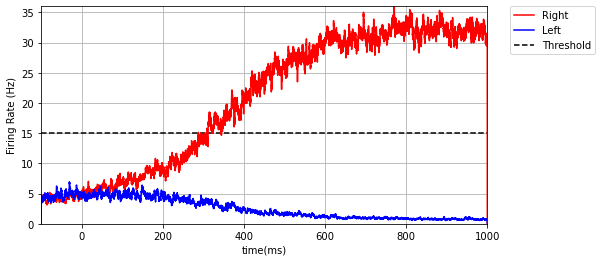

In [12]:
fig = plt.figure(figsize=(8,4))

plt.plot(time,Firing_target_1,'-',color='red',label="Right")
plt.plot(time,Firing_target_2,'-',color='blue',label="Left")
plt.grid()
plt.xlabel('time(ms)')
plt.ylabel('Firing Rate (Hz)')
plt.xlim((-100,1000))
plt.ylim((0,36))
plt.hlines(Threshold,-100,1000,color='black',linestyles='dashed',label="Threshold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Example_Firing_Pattern.png', bbox_inches='tight',dpi=300)

plt.show()


### Fitting

The LHS figure, shows a cumulative gaussian function fit to a plot of the proportion of rightward choices as a function of heading angle. Both the mean (mu) and standard deviation (sigma) were calculated from this fit. The mean is close to 0, as expected due to the identical number of leftward and rightward trials. The standard deviation is proportional to the steepness of the curve and so here, it is a measure of trial average preformance on correctness for each heading direction.   

The RHS figure indicates Reaction time as a function of heading direction. Incorrect responses are shown to have longer reaction times in both directions. The average RT by heading angle closly follows the correct responses due to the realitivly small number of incorrect responses.     

Want to see the relationship between mu and sigma of the choice & RT data. Can unisensory heading trial choice data predict RTs? 

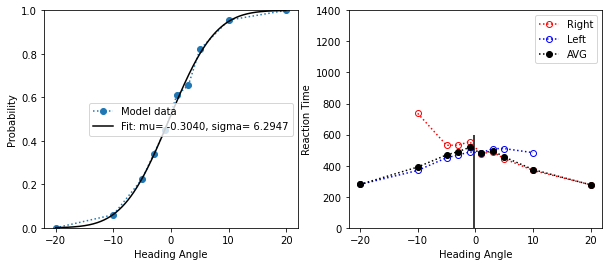

In [13]:
from scipy.optimize import curve_fit
from scipy.stats import norm

mu,sigma=curve_fit(norm.cdf,Vector_heading,Prob,p0=[0,1])[0]  # fitting the curve cumulative normal (norm.cdf)
                                                                # takes estimate for mean-mu and sd-sigma from experiment
    #vector_heading has 10 elements, vector_hed has 400

#Plotting    
fig = plt.figure(figsize=(10,4))

plt.subplot(121) # lhs heading & Prob (1=right,0=left)
plt.plot(Vector_heading,Prob,'o:',label='Model data') # plotting prob of answering left or right vs 10 heading directions
Vector_hed=np.arange(-20,20,0.1) #list of 400 numbers from -20.0 to 19.9
plt.plot(Vector_hed,norm.cdf(Vector_hed,mu,sigma),'k',label='Fit: mu= %2.4f, sigma= %2.4f'% (mu,sigma)) #fitting a cumulative distibution based on experiment data
plt.legend()
plt.xlabel('Heading Angle')
plt.ylabel('Probability')
plt.ylim(0,1)


plt.subplot(122)
plt.plot((Vector_heading),RT_coh_right,'o:',fillstyle='none',color='red',label="Right")
plt.plot((Vector_heading),RT_coh_left,'o:',fillstyle='none',color='blue',label="Left")
plt.plot((Vector_heading),RT_avg,'o:',color='black',label="AVG")
plt.vlines(mu,0,600,color='black')

plt.legend()
plt.ylim(0,1400)
plt.xlabel('Heading Angle')
plt.ylabel('Reaction Time')
plt.savefig('Visual Heading Behavioural.png', bbox_inches='tight',dpi=300)

plt.show()

# Reference
Butler, J. S., Smith, S. T., Campos, J. L., & Bülthoff, H. H. (2010). Bayesian integration of visual and vestibular signals for heading. Journal of vision, 10(11), 23-23.

Gu, Y., Angelaki, D. E., & DeAngelis, G. C. (2008). Neural correlates of multisensory cue integration in macaque MSTd. Nature neuroscience, 11(10), 1201-1210.  

Wong KF, Wang XJ. A recurrent network mechanism of time integration in perceptual decisions. J Neurosci. 2006 Jan 25;26(4):1314-28. doi: 10.1523/JNEUROSCI.3733-05.2006. PMID: 16436619; PMCID: PMC6674568.

Han Hou, Qihao Zheng, Yuchen Zhao, Alexandre Pouget, Yong Gu (2019)
Neural Correlates of Optimal Multisensory Decision Making under Time-Varying Reliabilities with an Invariant Linear Probabilistic Population Code, Neuron, Volume 104, Issue 5, Pages 1010-1021.e10

DeAngelis GC, Angelaki DE. Visual–Vestibular Integration for Self-Motion Perception. In: Murray MM, Wallace MT, editors. The Neural Bases of Multisensory Processes. Boca Raton (FL): CRC Press/Taylor & Francis; 2012. Chapter 31. Available from: https://www.ncbi.nlm.nih.gov/books/NBK92839/